In [0]:
## IMPORT PACKAGE/MODULES
import pandas as pd
import numpy as np
import tensorflow
from keras import models
from keras.layers import Dense,Convolution2D,MaxPooling2D,Input,Flatten,Dropout,Conv2D,Activation,BatchNormalization
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
import pathlib
import os
from keras.preprocessing import image
from keras.utils import np_utils
#from google.colab import files
#uploaded = files.upload()
import io
from numpy import argmax
from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.


In [0]:
#DOWNLOAD DATASET VIA DATASET URL
!wget https://he-public-data.s3-ap-southeast-1.amazonaws.com/HE_Challenge_data.zip
  

--2019-11-28 15:09:03--  https://he-public-data.s3-ap-southeast-1.amazonaws.com/HE_Challenge_data.zip
Resolving he-public-data.s3-ap-southeast-1.amazonaws.com (he-public-data.s3-ap-southeast-1.amazonaws.com)... 52.219.36.155
Connecting to he-public-data.s3-ap-southeast-1.amazonaws.com (he-public-data.s3-ap-southeast-1.amazonaws.com)|52.219.36.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 948965311 (905M) [application/zip]
Saving to: ‘HE_Challenge_data.zip’

HE_Challenge_data.z 100%[===================>] 905.00M  19.5MB/s    in 48s     

2019-11-28 15:09:52 (18.7 MB/s) - ‘HE_Challenge_data.zip’ saved [948965311/948965311]



In [0]:
#UNZIP THE DATASET
#!unzip HE_Challenge_data.zip
!unzip '/content/drive/My Drive/HE_Challenge_data.zip'

Archive:  /content/drive/My Drive/HE_Challenge_data.zip
  inflating: data/sample_submission.csv  
  inflating: data/test.csv           
   creating: data/test/
  inflating: data/test/.DS_Store     
  inflating: data/test/18540.jpg     
  inflating: data/test/18541.jpg     
  inflating: data/test/18542.jpg     
  inflating: data/test/18543.jpg     
  inflating: data/test/18544.jpg     
  inflating: data/test/18545.jpg     
  inflating: data/test/18546.jpg     
  inflating: data/test/18547.jpg     
  inflating: data/test/18548.jpg     
  inflating: data/test/18549.jpg     
  inflating: data/test/18550.jpg     
  inflating: data/test/18551.jpg     
  inflating: data/test/18552.jpg     
  inflating: data/test/18553.jpg     
  inflating: data/test/18554.jpg     
  inflating: data/test/18555.jpg     
  inflating: data/test/18556.jpg     
  inflating: data/test/18557.jpg     
  inflating: data/test/18558.jpg     
  inflating: data/test/18559.jpg     
  inflating: data/test/18560.jpg     
  in

In [0]:
!ls

data  drive  HE_Challenge_data.zip  sample_data


In [0]:
## VISUALIZATION

In [0]:
def train_data(target_size):
        df = pd.read_csv(r'/content/data/train.csv')
       
        df=df.values   ##image_id,category
        X=df[:,0]
        Ytrain=df[:,1]
        m=X.shape[0]
        xtrain=np.empty((m,*target_size,3))
        
        for i,img in enumerate(X):
            image1=str(img)
            img_url=os.path.join("/content/data/train/",image1)
            img=image.load_img(img_url+".jpg")
            
            img=img.resize(target_size)
            xtrain[i]=np.array(img,dtype=np.float32)/255.0
            img.close()          
        return xtrain,to_categorical(Ytrain) 

In [0]:
#TARGET SIZE OF EACH IMAGE IS 150,150,3
Xtrain,Ytrain=train_data((150,150))

In [0]:
#Shape of dataset
print(Xtrain.shape)

(18540, 150, 150, 3)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
81


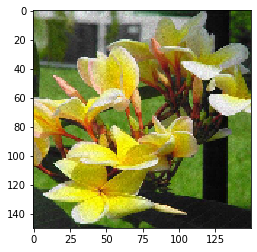

In [0]:
from numpy import argmax
plt.imshow(Xtrain[1])
print(Ytrain[1])         # LABEL IN ONE HOT VECTOR
print(argmax(Ytrain[1])) # ORGIAL LABEL

In [0]:
from keras.utils import np_utils

In [0]:

df = pd.read_csv('/content/data/train.csv')
df=df.values
y=df[:,1]
yt=np_utils.to_categorical(y)
print(np.unique(y,return_counts=True))
print(type(y))


(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102]), array([ 90, 135,  90, 126, 147, 102,  90, 192, 105, 102, 198, 198, 111,
       108, 111,  93, 192, 186, 111, 126,  90, 135, 207,  96,  93,  93,
        90, 150, 177, 192, 117, 102, 105,  90,  99, 171, 243, 126,  93,
       153, 288, 135, 294, 210,  90, 441, 153, 162, 111, 207, 582, 192,
       210, 138, 162, 246, 153, 258, 153, 246, 114, 126, 123, 117, 231,
       138,  96, 123, 123, 141, 177, 216, 438, 387, 270, 243, 567, 309,

In [0]:
##TO DO SOME CONCATENATION OF STRING IN TRAIN.CSV
import pandas as pd
df=pd.read_csv(r"/content/data/train.csv")
df["image_id"]=df["image_id"].astype('str')
df["category"]=df["category"].astype('str')
df["image_id"]=df["image_id"] + ".jpg"
df.head()
df.to_csv(r"/content/data/train.csv")


In [0]:
# TO GENERATE IMAGES USING ImageDataGenerator
df=pd.read_csv(r'/content/data/train.csv')
df["image_id"]=df["image_id"].astype('str') 
df["category"]=df["category"].astype('str')

datagen=ImageDataGenerator(rescale=1./255,rotation_range=0.5,width_shift_range=0.5,height_shift_range=0.25
                           ,horizontal_flip=True,validation_split=0.2,zoom_range = 0.2)
train_generator=datagen.flow_from_dataframe(dataframe=df, directory=r"/content/data/train", x_col= "image_id",
                                            y_col="category", class_mode="categorical", target_size=(256,256), 
                                            batch_size=32,validate_filenames=False)

Found 18540 non-validated image filenames belonging to 102 classes.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
### CONVOLUTIONAL NEURAL NETWORK MODEL
model=models.Sequential()

In [0]:
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(Dropout(0.2))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(Dropout(0.2))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(103,activation='softmax'))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(256,256,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(102, activation='softmax'))

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
activation_6 (Activation)    (None, 256, 256, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 254, 254, 32)      9248      
_________________________________________________________________
activation_7 (Activation)    (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 127, 127, 64)     

In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
model =models.Sequential()
model.add(Conv2D(32, kernel_size = (5, 5), activation='relu', input_shape=(150, 150, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(4,4), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(103, activation = 'softmax'))


In [0]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics = ['accuracy'])

In [0]:
hist=model.fit(Xtrain,Ytrain,batch_size=256,epochs=50)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/50





18540/18540 [==============================] - 35s 2ms/step - loss: 4.3765 - acc: 0.0378
Epoch 2/50
18540/18540 [==============================] - 28s 2ms/step - loss: 3.7266 - acc: 0.1023
Epoch 3/50
18540/18540 [==============================] - 28s 2ms/step - loss: 3.1398 - acc: 0.1896
Epoch 4/50
18540/18540 [==============================] - 28s 2ms/step - loss: 2.7152 - acc: 0.2813
Epoch 5/50
18540/18540 [==============================] - 28s 2ms/step - loss: 2.3019 - acc: 0.3769
Epoch 6/50
18540/18540 [==============================] - 28s 2ms/step - loss: 2.0212 - acc: 0.4456
Epoch 7/50
18540/18540 [==============================] - 28s 2ms/step - loss: 1.7816 - acc: 0.5009
Epoch 8/50
18540/18540 [==============================] - 28s 2ms/step - loss: 1.5866 - acc: 0.5448
Epoch 9/50
18540/18540 [==============================] - 28s 2ms/step - loss: 1.4231 - acc: 0.593

In [0]:
# Save entire model to a HDF5 file
model.save('flower_rehan.h5')

In [0]:
import keras
new_model = keras.models.load_model('/content/flower_rehan.h5')
new_model.summary()









Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 146, 146, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
dropout_2 (Dropout)          (None, 71, 71, 64)        0         
________________

In [0]:
 new_hist=new_model.fit(Xtrain,Ytrain,batch_size=256,epochs=5)

Epoch 1/5
18540/18540 [==============================] - 29s 2ms/step - loss: 2.0392 - acc: 0.4313
Epoch 2/5
18540/18540 [==============================] - 29s 2ms/step - loss: 1.7900 - acc: 0.4942
Epoch 3/5
18540/18540 [==============================] - 29s 2ms/step - loss: 1.6081 - acc: 0.5397
Epoch 4/5
18540/18540 [==============================] - 29s 2ms/step - loss: 1.4053 - acc: 0.5913
Epoch 5/5
18540/18540 [==============================] - 29s 2ms/step - loss: 1.2635 - acc: 0.6310


In [0]:
####-------------->
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
#STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    epochs=50)

Epoch 1/50





579/579 [==============================] - 340s 587ms/step - loss: 4.3316 - acc: 0.0499
Epoch 2/50
579/579 [==============================] - 335s 578ms/step - loss: 3.9436 - acc: 0.0742
Epoch 3/50
579/579 [==============================] - 332s 573ms/step - loss: 3.7069 - acc: 0.1064
Epoch 4/50
579/579 [==============================] - 330s 570ms/step - loss: 3.5075 - acc: 0.1310
Epoch 5/50
579/579 [==============================] - 330s 569ms/step - loss: 3.3723 - acc: 0.1533
Epoch 6/50
188/579 [========>.....................] - ETA: 3:42 - loss: 3.2799 - acc: 0.1705

Epoch 1/2
18540/18540 [==============================] - 27s 1ms/step - loss: 0.1390 - acc: 0.9546
Epoch 2/2
18540/18540 [==============================] - 27s 1ms/step - loss: 0.1213 - acc: 0.9599


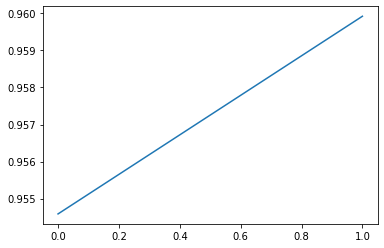

In [0]:
plt.plot(new_model.fit(Xtrain,Ytrain,batch_size=256,epochs=2).history['acc'])

In [0]:
model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    epochs=50)

In [0]:
#------------------------->>>

In [0]:
  hist=model.fit(Xtrain,Ytrain,batch_size=256,epochs=50)

In [0]:
plt.figure(0)
plt.plot(hist.history['acc'])
plt.title("Accuracy")
plt.show()

NameError: ignored

<Figure size 432x288 with 0 Axes>

In [0]:
plt.figure(0)
plt.plot(hist.history['loss'])
plt.title("Loss")
plt.show()

NameError: ignored

<Figure size 432x288 with 0 Axes>

In [0]:
model.fit(Xtrain,Ytrain,batch_size=256,epochs=5,validation_split=0.05)


In [0]:
 uploaded1 = files.upload()

In [0]:
#TO LOAD TEST IMAGES FROM DATASET TO TEST OUR MODEL
def test_data(target_size):
        df = pd.read_csv("/content/data/sample_submission.csv")
       
        df=df.values   ##image_id,category
        X=df[:,0]
        m=X.shape[0]
        xtrain=np.empty((m,*target_size,3))
        
        
        for i,img in enumerate(X):
            image1=str(img)
            img_url=os.path.join("/content/data/test/",image1)
            img=image.load_img(img_url+".jpg")
            
            img=img.resize(target_size)
            xtrain[i]=np.array(img,dtype=np.float32)/255.0
            img.close()          
        return xtrain 

In [0]:
xtest=test_data((150,150))

In [0]:
!ls

data  drive  flower_rehan.h5  HE_Challenge_data.zip  sample_data


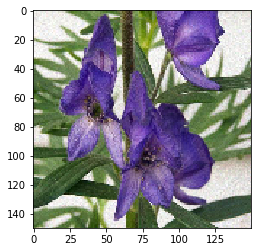

In [0]:
plt.imshow(xtest[0])

In [0]:
ytest=new_model.predict(xtest)

In [0]:
ytest

array([[4.4388671e-18, 1.2029096e-13, 8.9812387e-14, ..., 3.0873088e-28,
        5.7666800e-30, 1.4847817e-34],
       [2.2420442e-12, 1.2047760e-06, 8.5434086e-09, ..., 3.2194314e-19,
        1.8455147e-20, 1.1930463e-19],
       [4.7119622e-16, 1.0566141e-08, 1.2436257e-05, ..., 2.4724771e-12,
        4.2418475e-04, 1.5709760e-06],
       ...,
       [4.7672987e-18, 1.1570621e-11, 3.6344456e-09, ..., 1.6900665e-14,
        3.4494252e-22, 9.3882234e-20],
       [1.2527922e-18, 2.3237631e-07, 2.6465804e-12, ..., 3.6996465e-19,
        2.2962200e-16, 1.5274012e-25],
       [4.1887893e-14, 7.4848922e-10, 1.0843372e-11, ..., 9.5904807e-22,
        2.2872001e-25, 3.4620770e-23]], dtype=float32)

In [0]:
print(ytest.shape)

(2009, 103)


In [0]:
#PREDICTION IN ONE HOT VECTOR
def getpredict(xtest):
  ytest=new_model.predict(xtest)
  labels=np.zeros(ytest.shape)
  labels[ytest>0.5]=1
  return labels

In [0]:
labels=getpredict(xtest)

In [0]:
labels[3]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0.])

In [0]:
from numpy import argmax
output=argmax(labels,axis=1)

In [0]:
print(output[3:10])

[98 74 40 20  0 51 89]


In [0]:
sample_sub=pd.read_csv("/content/data/sample_submission.csv")
sample_sub['category']=output
sample_sub.to_csv("/content/data/sample_submission.csv")

In [0]:
print(sample_sub)

In [0]:
from google.colab import files
files.download('/content/data/sample_submission.csv') 
